In [1]:
# for creating a responsive plot
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib ipympl

In [2]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import math
import awkward as ak

In [3]:

file = 'nu/nue_dune10kt_1x2x6_1106_617_20230826T163359Z_gen_g4_detsim_hitreco_VenusaurusTrainingFiles'

fileName = '/Users/isobel/Desktop/DUNE/Ivysaurus/Venusaurus/files/' + file + '.root'

file = uproot.open(fileName)
tree = file['venusaurus/venusaur']
branches = tree.arrays()

In [4]:
INDEX = 0

In [5]:
print('PDG: ', branches['TruePDG'][INDEX])
print('Run: ', branches['Run'][INDEX])
print('Subrun: ', branches['Subrun'][INDEX])
print('Event: ', branches['Event'][INDEX])
print('TrackScore: ', branches['TrackScore'][INDEX])
print('Completeness: ', branches['Completeness'][INDEX])
print('Purity: ', branches['Purity'][INDEX])

PDG:  11
Run:  1106
Subrun:  1
Event:  61701
TrackScore:  0.41379616
Completeness:  0.9049695
Purity:  0.70135134


x_true:  [-76.5, -30.1]
y_true:  [-451, -501]
z_true:  [255, 332]


AttributeError: no field named 'size'

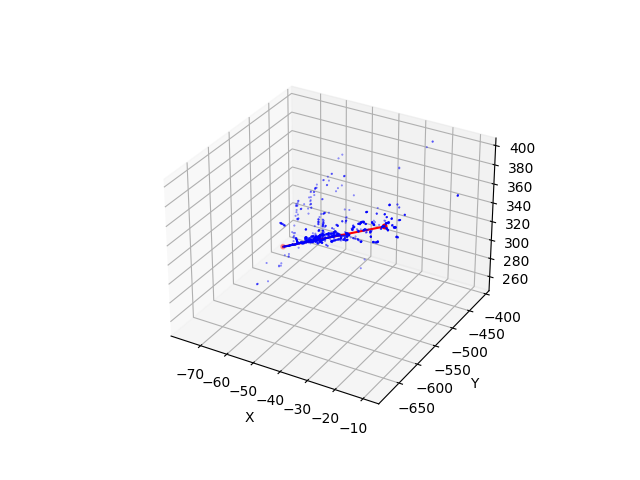

In [6]:
# RecoStart Fitting

# Plot SpacePoints
x = branches['SpacePoints'][INDEX][:,0]
y = branches['SpacePoints'][INDEX][:,1]
z = branches['SpacePoints'][INDEX][:,2]

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(x, y, z, color = "blue", s = 0.2, alpha = 0.5)
plt.xlabel('X')
plt.ylabel('Y')

x_recoStart = branches['FitPositions_recoStart'][INDEX][:,0]
y_recoStart = branches['FitPositions_recoStart'][INDEX][:,1]
z_recoStart = branches['FitPositions_recoStart'][INDEX][:,2]

print('x_true: ', x_recoStart)
print('y_true: ', y_recoStart)
print('z_true: ', z_recoStart)
ax.scatter(x_recoStart, y_recoStart, z_recoStart, color = "red", s = 10)
ax.plot(x_recoStart, y_recoStart, z_recoStart, color = "red")

# show plot
plt.show()

In [ ]:
# Sliding linear fit

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(x, y, z, color = "blue", s = 0.2, alpha = 0.5)
plt.xlabel('X')
plt.ylabel('Y')
#plt.zlabel('Z')

x_track = branches['FitPositions_track'][INDEX][:,0]#[branches['FitPositions_track'][INDEX][:,0] > -999]
y_track = branches['FitPositions_track'][INDEX][:,1]#[branches['FitPositions_track'][INDEX][:,1] > -999]
z_track = branches['FitPositions_track'][INDEX][:,2]#[branches['FitPositions_track'][INDEX][:,2] > -999]

print('x_track: ', x_track)
print('y_track: ', y_track)
print('z_track: ', z_track)
ax.scatter(x_track, y_track, z_track, color = "black", s = 2)
ax.plot(x_track, y_track, z_track, color = "black")

# show plot
plt.show()

TrackScore:  0.41379616
Fitting as a shower


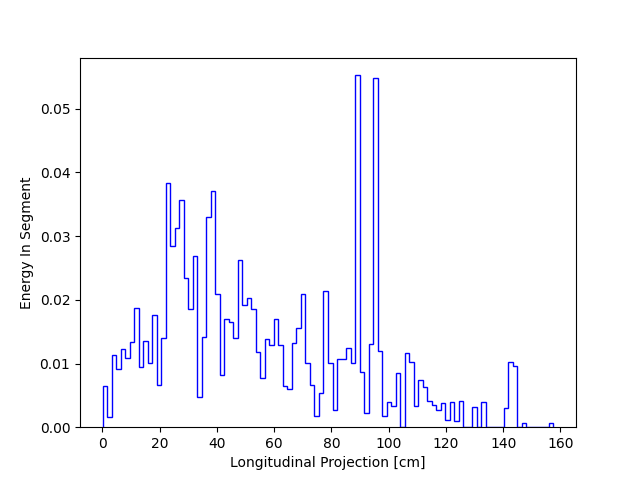

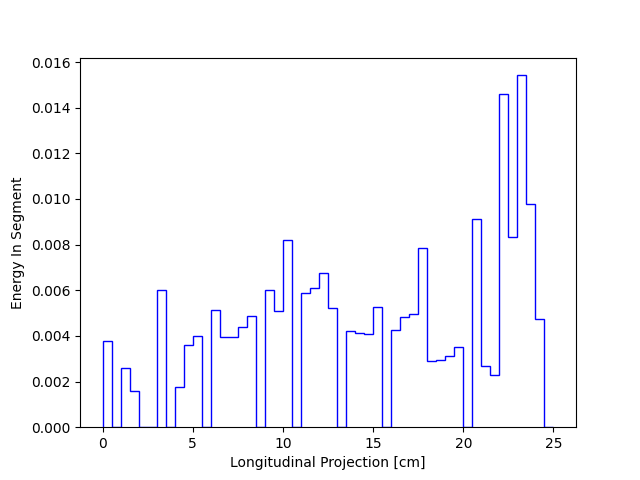

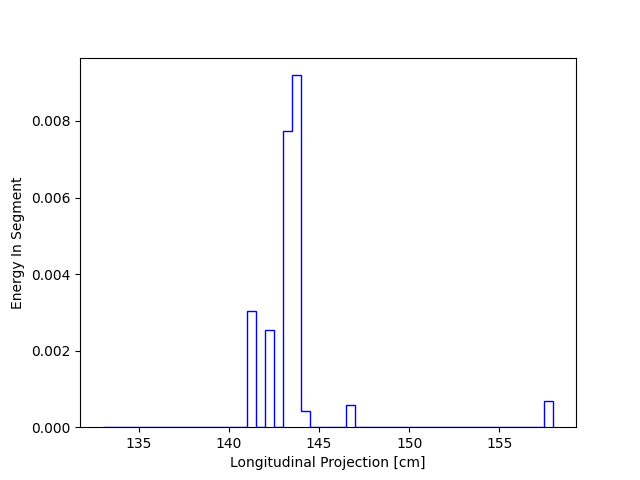

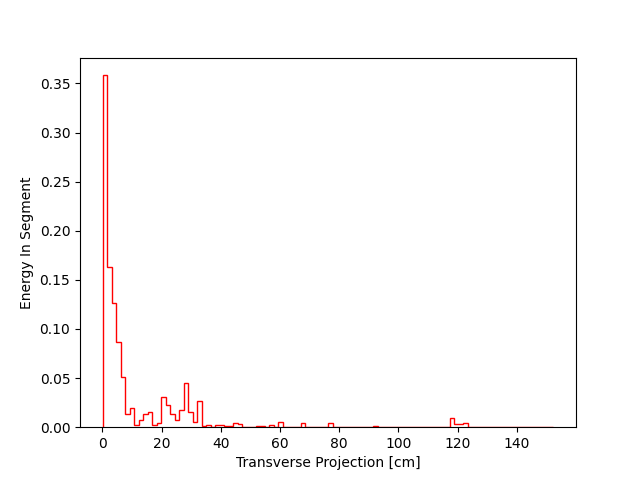

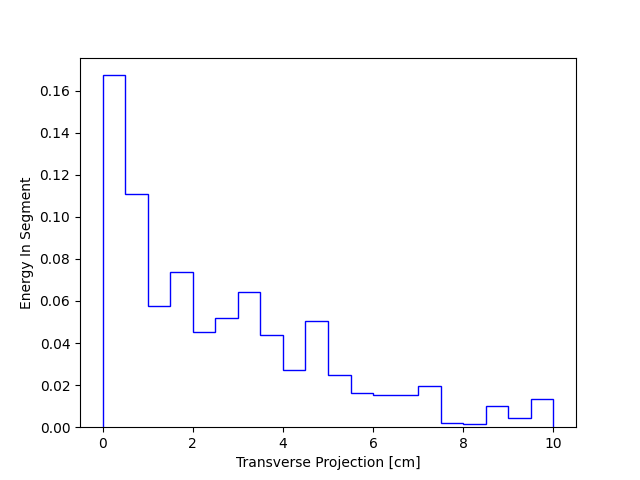

In [7]:
# Plot profiles

#######################################
# Some plot parameters
#######################################
extremaLength = 25.0 #To define start and end regions
moliereRadius = 10.0
nBinsLong = 50
nBinsTransv = 20

print('TrackScore: ', branches['TrackScore'][INDEX])

#######################################
# Get appropriate fit
#######################################
if (branches['TrackScore'][INDEX] > 0.5) :
    print('Fitting as a track')
    longitudinal = branches['Longitudinal_track'][INDEX]
    transverse = branches['Transverse_track'][INDEX]
    energy = branches['Energy_track'][INDEX]
else :
    print('Fitting as a shower')
    longitudinal = branches['Longitudinal_recoStart'][INDEX]
    transverse = branches['Transverse_recoStart'][INDEX]
    energy = branches['Energy_recoStart'][INDEX]
    
#######################################
# Whole Longitudinal Profile
#######################################
figLong = plt.figure()
plt.hist(longitudinal, bins=100, weights=energy, color='blue', histtype='step')
plt.xlabel('Longitudinal Projection [cm]')
plt.ylabel('Energy In Segment')
plt.show()

#######################################
# Start 25cm of Longitudinal Profile
#######################################
figStartLong = plt.figure()
plt.hist(longitudinal, bins=nBinsLong, range=[0,extremaLength], weights=energy, color='blue', histtype='step')
plt.xlabel('Longitudinal Projection [cm]')
plt.ylabel('Energy In Segment')
plt.show()

#######################################
# End 25cm of Longitudinal Profile
#######################################
figEndLong = plt.figure()
maxL = np.ceil(np.max(np.array(longitudinal))/0.5) * 0.5
plt.hist(longitudinal, bins=nBinsLong, range=[(maxL - extremaLength), maxL], weights=energy, color='blue', histtype='step')
plt.xlabel('Longitudinal Projection [cm]')
plt.ylabel('Energy In Segment')
plt.show()

#######################################
# Whole Transverse Profile
#######################################
figTransv = plt.figure()
plt.hist(transverse, bins=100, weights=energy, color='red', histtype='step')
plt.xlabel('Transverse Projection [cm]')
plt.ylabel('Energy In Segment')
plt.show()

#######################################
# Moliere Radius Transverse Profile
#######################################
figTransvMol = plt.figure()
plt.hist(transverse, bins=nBinsTransv, range=[0, moliereRadius], weights=energy, color='blue', histtype='step')
plt.xlabel('Transverse Projection [cm]')
plt.ylabel('Energy In Segment')
plt.show()


In [ ]:
# Plot SpacePoints
x = branches['SpacePoints'][INDEX][:,0]
y = branches['SpacePoints'][INDEX][:,1]
z = branches['SpacePoints'][INDEX][:,2]

fig1 = plt.figure()
ax1 = plt.axes(projection='3d')

ax1.scatter(x, y, z, color = "blue", s = 0.2, alpha = 0.5)
plt.xlabel('X')
plt.ylabel('Y')
#plt.zlabel('Z')

#True fitting
'''
x_true = branches['FitPositions_true'][INDEX][:,0]
y_true = branches['FitPositions_true'][INDEX][:,1]
z_true = branches['FitPositions_true'][INDEX][:,2]

print('x_true: ', x_true)
print('y_true: ', y_true)
print('z_true: ', z_true)
ax.scatter(x_true, y_true, z_true, color = "black", s = 10)
ax.plot(x_true, y_true, z_true, color = "black")
'''

# RecoStart Fitting

x_recoStart = branches['FitPositions_recoStart'][INDEX][:,0]
y_recoStart = branches['FitPositions_recoStart'][INDEX][:,1]
z_recoStart = branches['FitPositions_recoStart'][INDEX][:,2]

print('x_true: ', x_recoStart)
print('y_true: ', y_recoStart)
print('z_true: ', z_recoStart)
ax1.scatter(x_recoStart, y_recoStart, z_recoStart, color = "red", s = 10)
ax1.plot(x_recoStart, y_recoStart, z_recoStart, color = "red")

# show plot
plt.show()

# PCA Fitting
'''
x_pca = branches['FitPositions_pca'][INDEX][:,0]
y_pca = branches['FitPositions_pca'][INDEX][:,1]
z_pca = branches['FitPositions_pca'][INDEX][:,2]

print('x_pca: ', x_pca)
print('y_pca: ', y_pca)
print('z_pca: ', z_pca)
ax.scatter(x_pca, y_pca, z_pca, color = "black", s = 10)
ax.plot(x_pca, y_pca, z_pca, color = "black")
'''

# TrackStub Fitting
'''
x_trackStub = branches['FitPositions_trackStub'][INDEX][:,0]
y_trackStub = branches['FitPositions_trackStub'][INDEX][:,1]
z_trackStub = branches['FitPositions_trackStub'][INDEX][:,2]

print('x_trackStub: ', x_trackStub)
print('y_trackStub: ', y_trackStub)
print('z_trackStub: ', z_trackStub)
ax.scatter(x_trackStub, y_trackStub, z_trackStub, color = "black", s = 10)
ax.plot(x_trackStub, y_trackStub, z_trackStub, color = "black")
'''

fig2 = plt.figure()
ax2 = plt.axes(projection='3d')

ax2.scatter(x, y, z, color = "blue", s = 0.2, alpha = 0.5)
plt.xlabel('X')
plt.ylabel('Y')
#plt.zlabel('Z')

# Sliding linear fit

x_track = branches['FitPositions_track'][INDEX][:,0]#[branches['FitPositions_track'][INDEX][:,0] > -999]
y_track = branches['FitPositions_track'][INDEX][:,1]#[branches['FitPositions_track'][INDEX][:,1] > -999]
z_track = branches['FitPositions_track'][INDEX][:,2]#[branches['FitPositions_track'][INDEX][:,2] > -999]

print('x_track: ', x_track)
print('y_track: ', y_track)
print('z_track: ', z_track)
ax2.plot(x_track, y_track, z_track, color = "black")

# show plot
plt.show()



